データの確認

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
train = pd.read_csv('output_data.csv')
test = pd.read_csv('output_test.csv')

# データサイズの確認
print(f'Train shape: {train.shape} Test shape: {test.shape}')

# 先頭行の出力
train.head()
test.head()

Train shape: (32561, 15) Test shape: (16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,">50K, <=50K."
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


統計量の確認

In [2]:
train.describe(include='all')
test.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,">50K, <=50K."
count,16281.000000,15318,1.628100e+04,16281,16281.000000,16281,15315,16281,16281,16281,16281.000000,16281.000000,16281.000000,16007,16281
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K.
freq,NaN,11210,NaN,5283,NaN,7403,2032,6523,13946,10860,NaN,NaN,NaN,14662,12435
mean,38.767459,NaN,1.894357e+05,NaN,10.072907,NaN,NaN,NaN,NaN,NaN,1081.905104,87.899269,40.392236,NaN,NaN
std,13.849187,NaN,1.057149e+05,NaN,2.567545,NaN,NaN,NaN,NaN,NaN,7583.935968,403.105286,12.479332,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.167360e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.778310e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.383840e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


相関関係の確認

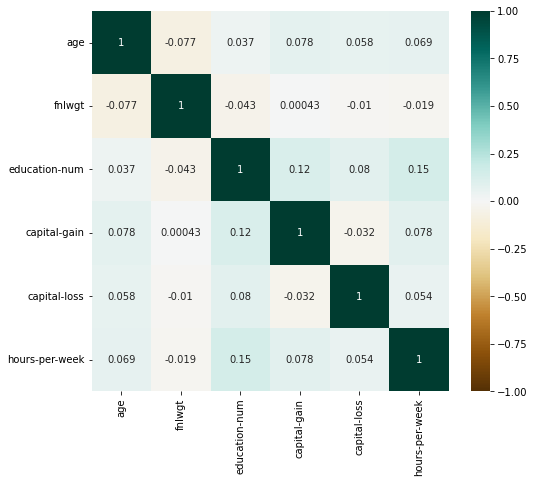

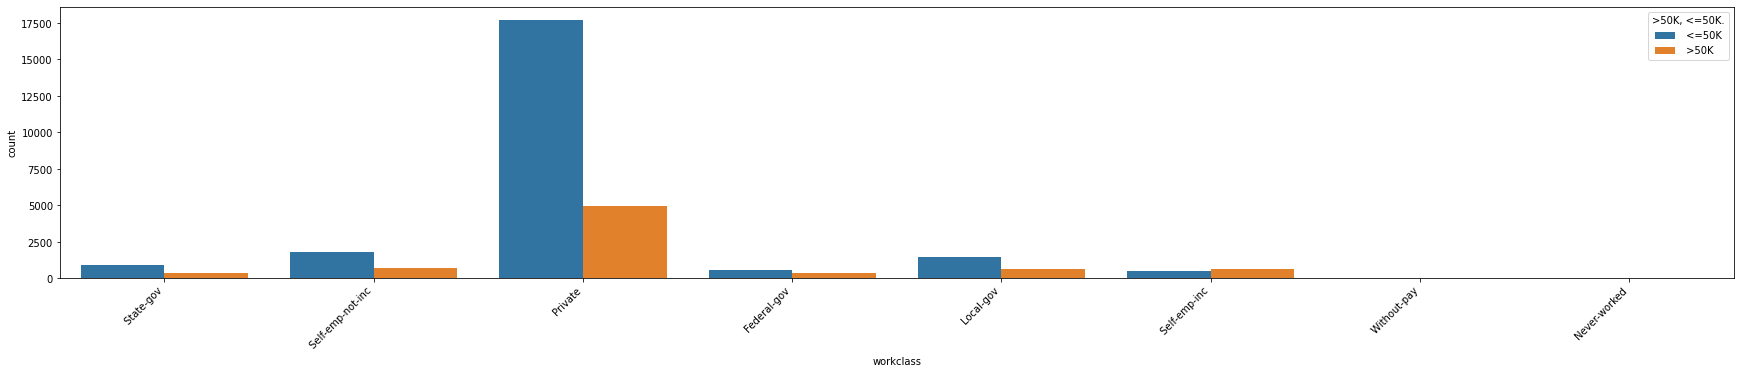

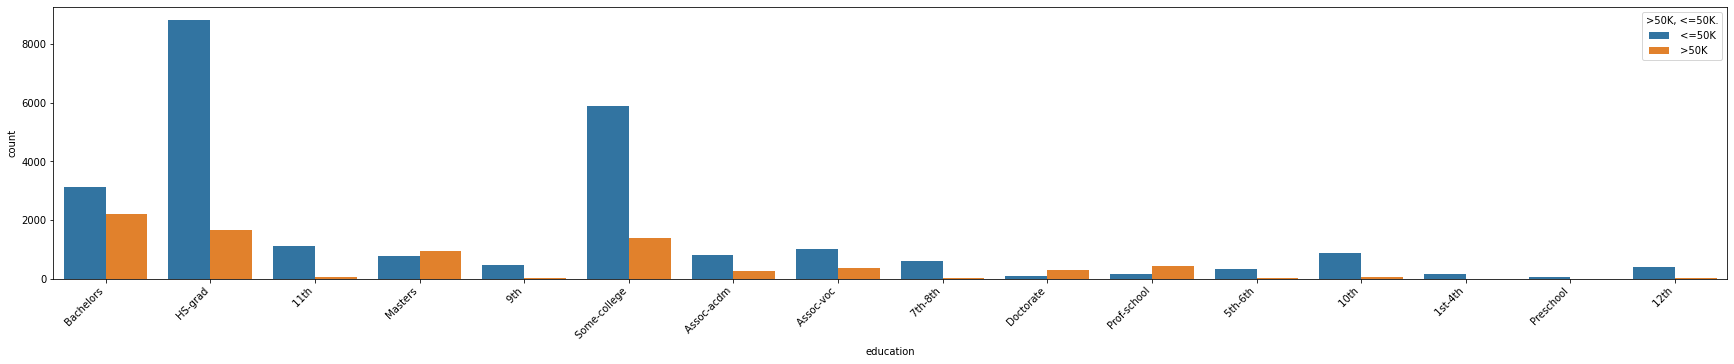

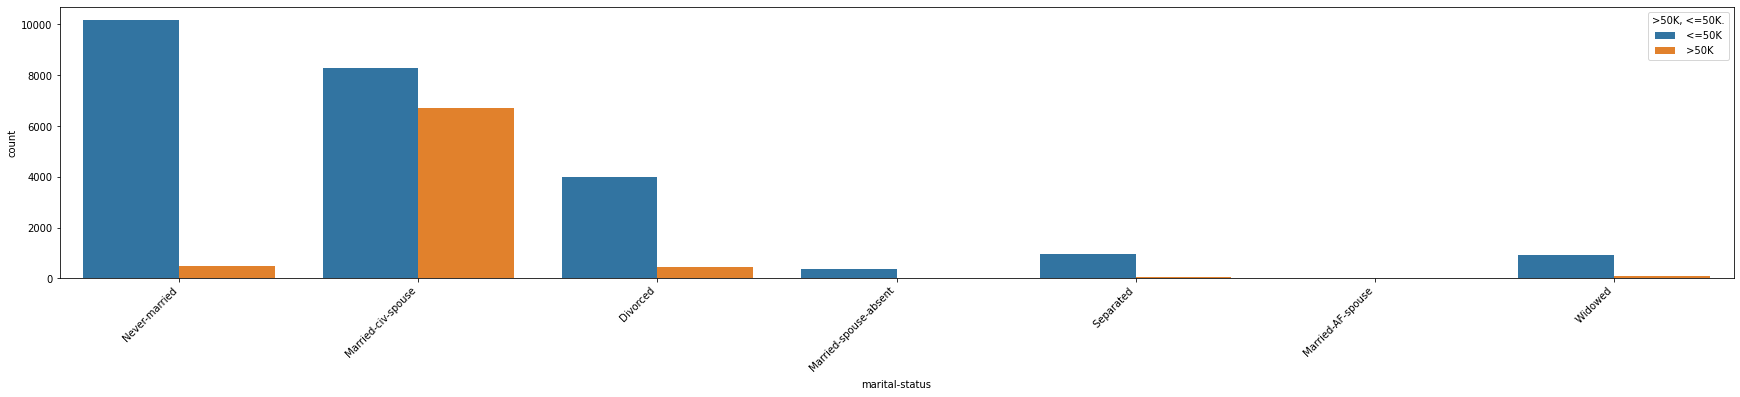

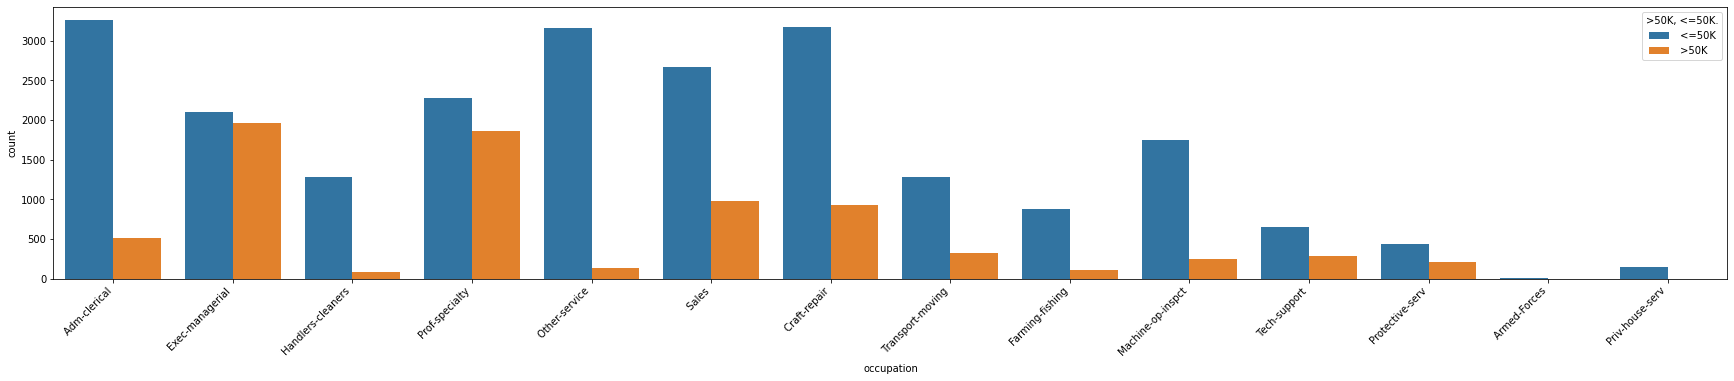

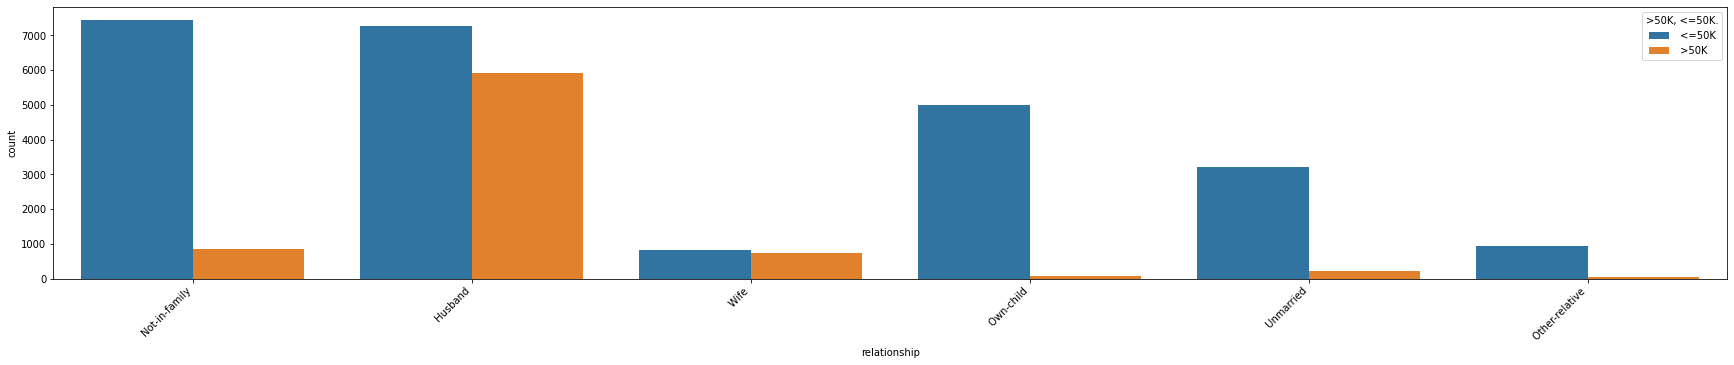

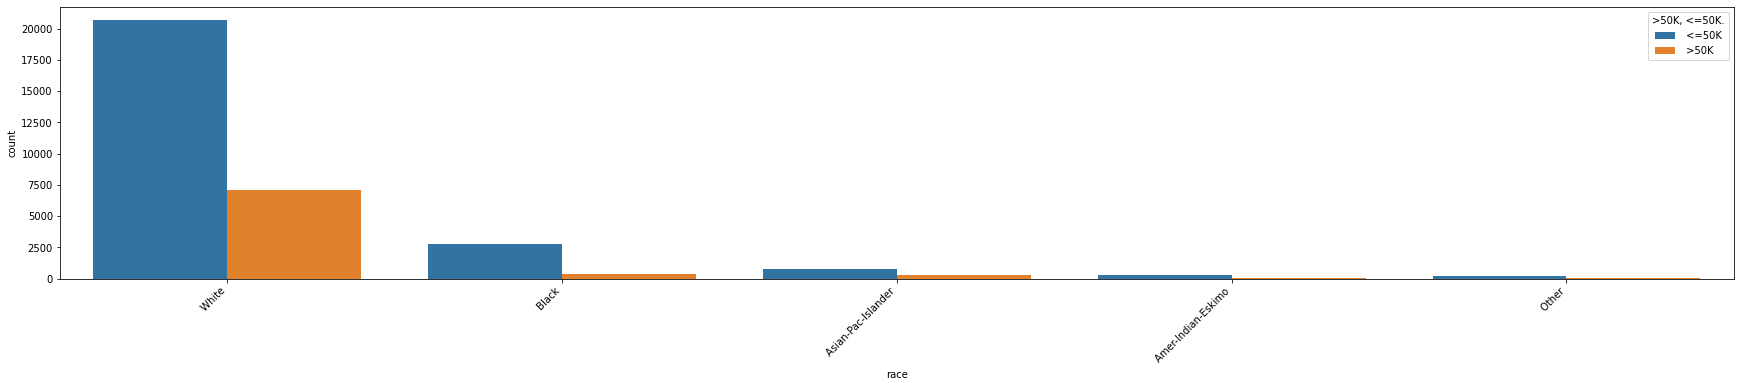

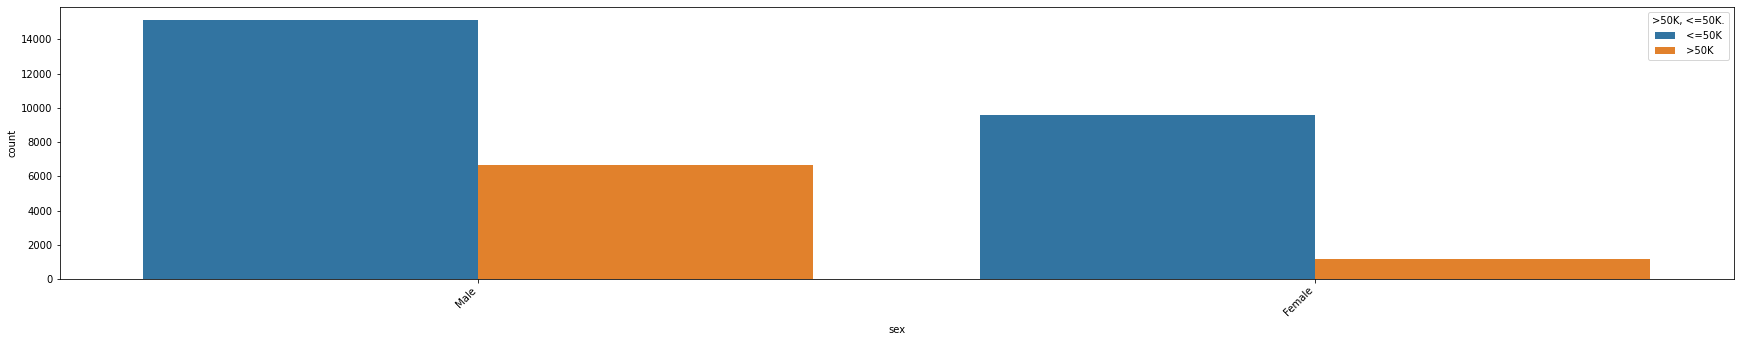

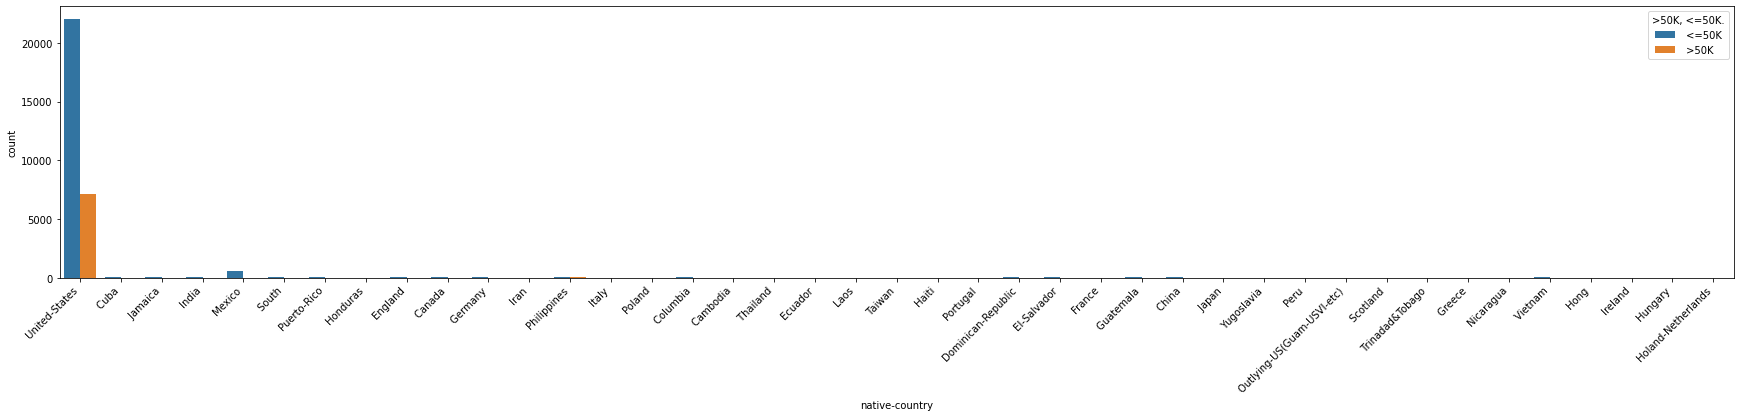

In [3]:
#変数間の相関関係のヒートマップ
fig = plt.figure(figsize=(8,7))
ax = sns.heatmap(train.corr(), annot=True, cmap='BrBG', vmin=-1, vmax=1)

#カテゴリ変数とラベルの関係
categorical_feature = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
for feature_name in categorical_feature:
    fig = plt.figure(figsize=(30,5))
    plt.xticks(rotation=45, ha="right")
    ax = sns.countplot(x=feature_name, hue='>50K, <=50K.', data=train)
    plt.show()

欠損値とクラスの関係（欠損値がある場合はP.94参照）

In [4]:
print(f'Null of Train: {(train.isnull().sum())}')
print(f'Null of Test: {(test.isnull().sum())}')

Null of Train: age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
>50K, <=50K.         0
dtype: int64
Null of Test: age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
>50K, <=50K.        0
dtype: int64


前処理

In [5]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

# 特徴量エンジニアリング
train = train.dropna(subset=['workclass','occupation', 'native-country']) #欠損値があるカラムがあれば指定

# カテゴリカル変数の定義
multi_categorical_feature = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race','native-country']
binary_categorical_feature = ['sex']
numerous_feature = ['age', 'fnlwgt', 'education-num','capital-gain', 'capital-loss', 'hours-per-week']

# 1. One-Hot Encoding for multi_categorical_feature
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid multicollinearity
one_hot_encoded = one_hot_encoder.fit_transform(train[multi_categorical_feature])
df_one_hot = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(multi_categorical_feature))
train = train.drop(columns=multi_categorical_feature).reset_index(drop=True)  # Drop original columns
train = pd.concat([train, df_one_hot], axis=1)  # Concatenate the one hot encoded columns

# 2. Ordinal Encoding for binary_categorical_feature
ordinal_encoder = OrdinalEncoder()
train[binary_categorical_feature] = ordinal_encoder.fit_transform(train[binary_categorical_feature])

# 3. Standard Scaling for numerous_feature
scaler = StandardScaler()
train[numerous_feature] = scaler.fit_transform(train[numerous_feature])

train['>50K, <=50K.'] = train['>50K, <=50K.'].replace({' <=50K': 0, ' >50K': 1})
train['>50K, <=50K.'] = train['>50K, <=50K.'].replace({' <=50K.': 0, ' >50K.': 1})
train = train.rename(columns={'>50K, <=50K.': 'target'})

train['target'] = train['target'].replace({'+': 0, '-': 1})
train.to_csv('adult_one_hot.csv', index=False)